In [5]:
# make the main figure for the csu plot!

# functions used: make_plots_new_heights.py- crl plotting
# simple_flight_level_plot.py- in situ data plotting
# make_plots.plot_new_tdr()- tdr plotting

In [6]:
# import modules

import numpy as np
import xarray as xr
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings

os.chdir("/Users/etmu9498/research/code/scripts")
import make_plots_new_heights
import tc_metadata
import helper_fns
os.chdir("/Users/etmu9498/research/code/scripts/in-situ-scripts")
import in_situ_colorbar_lines
import sys
sys.path.append("/Users/etmu9498/research/code/scripts/plotting/")
import simple_flight_level_plot
sys.path.append("/Users/etmu9498/research/code/scripts/boundary-layer/")
import boundary_layer_scripts

In [113]:
### Helper functions 1 through 3 used to make this plot: plotting crl power

def plot_power_ch1( data_path, data_file, fsize=26):
    warnings.filterwarnings("ignore")
    # get data
    os.chdir( data_path)
    crl_data = xr.open_dataset( data_file)

    
    # choose x axis
    xaxis = crl_data.in_situ_distance
    # plot things
    plt.pcolormesh(  xaxis, - crl_data.H_new, crl_data.power_new.transpose(), vmin = -30, vmax =-10)
    
    
    '''
    # this is how to plot crl data using tdr scale! indicese were off by one in 2nd line
    xaxis = crl_data.tdr_distance
    plt.pcolormesh(  xaxis, - crl_data.H_new, crl_data.power_new.transpose()[:, 0:-1], vmin = -30, vmax =-10)
    '''
    
    plt.ylabel( 'Height (km)')    
    cbar = plt.colorbar()
    cbar.ax.set_ylabel( ylabel="CRL Return Power (dBz)", fontsize=fsize)
    cbar.ax.tick_params(labelsize=fsize)
    plt.grid( 'on')
    ax = plt.gca()
    ax.set_facecolor('k')
    warnings.filterwarnings("default")
    

def plot_T( data_path, data_file, fsize=26):
    warnings.filterwarnings("ignore")
    # get data
    os.chdir( data_path)
    new_crl = xr.open_dataset( data_file)
    color_map = plt.cm.get_cmap( "RdYlBu").reversed()

    # choose x axis with helper script
    xaxis = crl_data.in_situ_distance

    plt.pcolormesh( xaxis, - new_crl.H_new, new_crl.T_new.transpose(), cmap = color_map, vmin=5, vmax=30 )
    cbar = plt.colorbar()
    cbar.ax.set_ylabel( ylabel="CRL Temperature ( C)", fontsize=fsize)
    cbar.ax.tick_params(labelsize=fsize)

    plt.ylabel( 'Height (km)')
    plt.grid( 'on')
    ax = plt.gca()
    ax.set_facecolor('k')
    warnings.filterwarnings("default")


def plot_wvmr(data_path, data_file, fsize=26):
    # get data
    os.chdir( data_path)
    crl_data = xr.open_dataset( data_file)

    # choose x axis with helper script
    xaxis = crl_data.in_situ_distance

    # plot things
    plt.pcolormesh( xaxis, - crl_data.H_new, crl_data.wvmr_new.transpose(), vmin = 7.5, vmax =20)
    cbar = plt.colorbar()
    cbar.ax.set_ylabel( ylabel="CRL WVMR (g/Kg)", fontsize=fsize)
    cbar.ax.tick_params(labelsize=fsize)
    plt.ylabel( 'Height (km)')
    plt.grid( 'on')
    ax = plt.gca()
    ax.set_facecolor('k')

    
def plot_thetav( data_path, data_file, metadata, dataset, fsize=26):
    # load crl data and find crl theta and thetav
    os.chdir( data_path)
    crl_data = xr.open_dataset( data_file)

    newh, crl_theta, crl_thetav = boundary_layer_scripts.find_theta_thetav( tcname='sam', dataset=5)

    # use newpath and newname to load the corresponding xaxis from there! basically steal it and apply it to this dataset
    newpath = metadata[ 'um_crl_path']
    tdr_name, newname = tc_metadata.choose_new_data( metadata['tc_name'], dataset)
    
    os.chdir( newpath)
    new_crl_data = xr.open_dataset( newname)
    
    
    
    color_map = plt.cm.get_cmap( "RdYlBu").reversed()

    # choose x axis with helper script
    xaxis = new_crl_data.in_situ_distance

    # clip thetav matrix to limits defined in tc_metadata.py
    i1 = metadata['crl_range'][dataset][0]
    i2 = metadata['crl_range'][dataset][1]
    crl_thetav = crl_thetav[ i1:i2, :]
    
    plt.pcolormesh( xaxis, - new_crl_data.H_new, crl_thetav.transpose(), cmap = color_map, vmin=300, vmax=325 )
    cbar = plt.colorbar()
    cbar.ax.set_ylabel( ylabel="CRL $\Theta_v$ ( K)", fontsize=fsize) # $\mathregular{\Theta_v}$
    cbar.ax.tick_params(labelsize=fsize)

    plt.ylabel( 'Height (km)')
    plt.grid( 'on')
    ax = plt.gca()
    ax.set_facecolor('k')
    warnings.filterwarnings("default")

    
    
def plot_rh(data_path, data_file, fsize=26):
    # get data
    os.chdir( data_path)
    crl_data = xr.open_dataset( data_file)

    # choose x axis with helper script
    xaxis = crl_data.in_situ_distance

    # plot things
    # 'Blues' 'GnBu'
    cmap = plt.get_cmap('GnBu')
    cmap = helper_fns.truncate_colormap(cmap, 0.1, 1.0)

    
    plt.pcolormesh( xaxis, - crl_data.H_new, crl_data.rh_new.transpose() , cmap = cmap, vmin = 60, vmax = 100 )
    cbar = plt.colorbar(label="Relative Humidity ( %)")
    cbar.ax.tick_params(labelsize=fsize)

    plt.ylabel( 'Height (km)')

    plt.grid( 'on')
    ax = plt.gca()
    ax.set_facecolor('k')

<>:101: DeprecationWarning: invalid escape sequence \T
<>:101: DeprecationWarning: invalid escape sequence \T
C:\Users\etmu9498\AppData\Local\Temp\ipykernel_22212\1152197900.py:101: DeprecationWarning: invalid escape sequence \T
  cbar.ax.set_ylabel( ylabel="CRL $\Theta_v$ ( K)", fontsize=fsize) # $\mathregular{\Theta_v}$


In [114]:
def plot_tdr( tdr_path, tdr_name, fsize=26):
    warnings.filterwarnings("ignore")

    # get data
    os.chdir( tdr_path)
    tdr_data = xr.open_dataset( tdr_name)

    xaxis = tdr_data.distance
    
    # make plot
    color_map = plt.cm.get_cmap( "RdYlBu").reversed()

    # plot data
    # get rid of nans and resize array to get rid of overlapping data
    # also, no need to use .transpose() because that was already done when making the datasets!
    reflectivity = tdr_data.REFLECTIVITY[ :, 0:len( xaxis)]
    # refl = tdr_data.REFLECTIVITY[:, lat_no_nan_ind] # another way?
    plt.pcolormesh( xaxis, tdr_data.height, reflectivity, cmap = color_map, vmin = -10, vmax = 50 )

    # making things prettier
    cbar = plt.colorbar( )
    cbar.ax.set_ylabel( ylabel="TDR Reflectivity (dBZ)", fontsize=fsize)
    cbar.ax.tick_params(labelsize=fsize)
    
    plt.ylabel( 'Height (Km)')
    plt.grid( 'on')
    warnings.filterwarnings("default")


In [115]:
### Helper function 5 used to plot in situ data


def plot_in_situ(crl_path, crl_name, tcdata, counter, xaxis='dist', plot_number=313):
    warnings.filterwarnings("ignore")

    in_situ_path = tcdata[ 'new_flight_data_path']
    in_situ_name = tc_metadata.choose_new_in_situ_name( tcdata['tc_name'], counter)

    # load in situ data
    os.chdir( in_situ_path)
    xr_in_situ = xr.open_dataset( in_situ_name)
    # load crl data to find the times corresponding to i1 and i2
    os.chdir( crl_path)
    crl_data = xr.open_dataset( crl_name)

    # crop in situ data
    # rename variables from xarray for convenience
    str_time = xr_in_situ.str_time
    float_time = xr_in_situ.float_time
    time1 = crl_data.time[ 0].values
    time2 = crl_data.time[ -1].values
    # find the in situ times nearest the crl times
    idx1 = (np.abs(float_time - time1)).argmin()
    idx2 = (np.abs(float_time - time2)).argmin()


    keyList = [ 'WS.d', 'UWZ.d', 'ASfmrRainRate.1', 'distance']
    # make an empty dict that will be filled soon!
    datatrim = {key: None for key in keyList}
    # fill dict with keys provided after editing data!
    for key in keyList:
        temp_var = empty_str_helper( xr_in_situ[key].values)
        temp_var = temp_var[ idx1.values : idx2.values]
        datatrim[ key] = temp_var



    # get the proper axis
    if xaxis == "time":
        xaxis_data = float_time
        xlabel = 'Time (UTC, Hours)'
    elif xaxis == "lon":
        xaxis_data = datatrim['LONref']
        xlabel = 'Longitude (Degrees)'
    elif xaxis == "lat":
        xaxis_data = datatrim['LATref']
        xlabel = 'Latitude (Degrees)'
    elif xaxis == 'dist':
        xaxis_data = datatrim['distance']
    else:
        print( "Please choose 'lon', 'lat', 'time', or 'dist' as a valid xaxis!")

    # make sure the x axis data is a numpy array for proper plotting
    xaxis_data = np.array(xaxis_data)

    #     ax1 = fig1[ 0].add_subplot( plot_number)
    fig = plt.gcf()
    ax1 = fig.add_subplot( plot_number)

    ax1.set_ylabel( 'Vertical Wind Speed (m/s)', c='y')
    ax1.set_xlabel( 'Distance from TC Center (km)')
    ax1.xaxis.grid( )
    ax1.yaxis.grid( )

    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Total Wind Speed (m/s)', c='c')
    
    ax3 = ax1.twinx()
    ax3.set_ylabel( 'SFMR Rain Rate (mm/hr)', c='b')
    ax3.spines.right.set_position(("axes", 1.1))

    # set y limits to separate plots nicely
    ax2.set_ylim([-60, 70])
    ax1.set_ylim([-25, 30])
    ax3.set_ylim([0,130])
    

    # actually plot everything!
    ax2.plot( xaxis_data, datatrim['WS.d'], c='c', label='Tangential Wind Speed (m/s)')
    ax1.plot( xaxis_data, datatrim['UWZ.d'], c='y', label='Vertical Wind Speed ( m/s)')
    ax3.plot( xaxis_data, datatrim['ASfmrRainRate.1'], c='b', label=' SFMR Rain Rate (mm/hr)')

    # manually set y ticks?
    ax2.set_yticks([0,30,60])
    ax1.set_yticks([-20,-10,0,10,20,30])
    ax3.set_yticks([0,20,40])

    # add an empty colorbar to make everything fit in line
    helper_fns.add_blank_colorbar(color='gray')

    warnings.filterwarnings("ignore")
    
    
# turn all string values into floats
# this is a longer function to account for empty strings: turn those values into nans
def empty_str_helper( return_var):
    return_var_temp = np.zeros( len( return_var))
    count = 0
    for line_ind in range( len( return_var)):
        if return_var[ line_ind] == '':
            return_var_temp[line_ind] = np.nan
            count += 1
        else:
            return_var_temp[ line_ind] = float( return_var[ line_ind])
    return return_var_temp.tolist()

In [116]:
# pretty much the same function as above, except that in situ measurements are stacked to highlight more data

def plot_in_situ_stacked(crl_path, crl_name, tcdata, counter, xaxis='dist', plot_number=313):
    warnings.filterwarnings("ignore")

    in_situ_path = tcdata[ 'new_flight_data_path']
    in_situ_name = tc_metadata.choose_new_in_situ_name( tcdata['tc_name'], counter)

    # load in situ data
    os.chdir( in_situ_path)
    xr_in_situ = xr.open_dataset( in_situ_name)
    # load crl data to find the times corresponding to i1 and i2
    os.chdir( crl_path)
    crl_data = xr.open_dataset( crl_name)

    # crop in situ data
    # rename variables from xarray for convenience
    str_time = xr_in_situ.str_time
    float_time = xr_in_situ.float_time
    time1 = crl_data.time[ 0].values
    time2 = crl_data.time[ -1].values
    # find the in situ times nearest the crl times
    idx1 = (np.abs(float_time - time1)).argmin()
    idx2 = (np.abs(float_time - time2)).argmin()


    keyList = [ 'WS.d', 'UWZ.d', 'ASfmrRainRate.1', 'distance']
    # make an empty dict that will be filled soon!
    datatrim = {key: None for key in keyList}
    # fill dict with keys provided after editing data!
    for key in keyList:
        temp_var = empty_str_helper( xr_in_situ[key].values)
        temp_var = temp_var[ idx1.values : idx2.values]
        datatrim[ key] = temp_var



    # get the proper axis
    if xaxis == "time":
        xaxis_data = float_time
        xlabel = 'Time (UTC, Hours)'
    elif xaxis == "lon":
        xaxis_data = datatrim['LONref']
        xlabel = 'Longitude (Degrees)'
    elif xaxis == "lat":
        xaxis_data = datatrim['LATref']
        xlabel = 'Latitude (Degrees)'
    elif xaxis == 'dist':
        xaxis_data = datatrim['distance']
    else:
        print( "Please choose 'lon', 'lat', 'time', or 'dist' as a valid xaxis!")

    # make sure the x axis data is a numpy array for proper plotting
    xaxis_data = np.array(xaxis_data)

    #     ax1 = fig1[ 0].add_subplot( plot_number)
    fig = plt.gcf()
    ax1 = fig.add_subplot( plot_number)

    ax1.set_ylabel( 'Vertical Wind Speed (m/s)', c='y')
    ax1.set_xlabel( 'Distance from TC Center (km)')
    ax1.xaxis.grid( )
    ax1.yaxis.grid( )

    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Total Wind Speed (m/s)', c='c')
    
    ax3 = ax1.twinx()
    ax3.set_ylabel( 'SFMR Rain Rate (mm/hr)', c='b')
    ax3.spines.right.set_position(("axes", 1.1))

    # set y limits to separate plots nicely
    # ax2.set_ylim([-60, 70])
    # ax1.set_ylim([-25, 30])
    # ax3.set_ylim([0,130])

    # ax2.set_ylim([-60, 70])
    ax1.set_ylim([-7.5, 15])
    ax3.set_ylim([-5,55])


    # actually plot everything!
    ax2.plot( xaxis_data, datatrim['WS.d'], c='c', label='Tangential Wind Speed (m/s)')
    ax1.plot( xaxis_data, datatrim['UWZ.d'], c='y', label='Vertical Wind Speed ( m/s)')
    ax3.plot( xaxis_data, datatrim['ASfmrRainRate.1'], c='b', label=' SFMR Rain Rate (mm/hr)')

    # manually set y ticks?
    # ax2.set_yticks([0,30,60])
    # ax1.set_yticks([-20,-10,0,10,20,30])
    # ax3.set_yticks([0,20,40])

    # add an empty colorbar to make everything fit in line
    helper_fns.add_blank_colorbar(color='gray')

    warnings.filterwarnings("ignore")
    
    
# turn all string values into floats
# this is a longer function to account for empty strings: turn those values into nans
def empty_str_helper( return_var):
    return_var_temp = np.zeros( len( return_var))
    count = 0
    for line_ind in range( len( return_var)):
        if return_var[ line_ind] == '':
            return_var_temp[line_ind] = np.nan
            count += 1
        else:
            return_var_temp[ line_ind] = float( return_var[ line_ind])
    return return_var_temp.tolist()

In [139]:
# brand new helper function used to create velocity arrows on top of reflectivty plot!
def vel_arrows( tdr_path, tdr_name, xaxis='dist', plot_type='tdr'):

        
    warnings.filterwarnings("ignore")
    # get data
    os.chdir( tdr_path)
    tdr_data = xr.open_dataset( tdr_name)

    # choose x axis type
    if xaxis == 'lon':
        x_label = 'longitude (degrees)'
        xaxis = tdr_data.longitude # [ ~np.isnan( tdr_data.longitude)]
    elif xaxis == 'lat':
        x_label = 'latitude (degrees)'
        xaxis = tdr_data.latitude # [ ~np.isnan( tdr_data.latitude)]

    elif xaxis == 'dist':
        xaxis = tdr_data.distance
        x_label = 'distance (km)'
    else:
        print("Error: Please Choose 'lat', 'lon', or 'dist' for the x axis")
        return

    
    # make plot
    ax = plt.gca()

    
    
    # get rid of nans and resize array to get rid of overlapping data
    uarrow = tdr_data.Radial_wind[ :, 0:len( xaxis)] # .transpose()
    warrow = tdr_data.Vertical_wind[ :, 0:len( xaxis)] # .transpose()
    
    if plot_type == 'tdr':
        color='k'
        arrow_spacing=6
        arrow_width=0.0015
        
        # slice down data to avoid arrow stacking + clutter
        wind_slice = (slice(None, None, arrow_spacing), slice(None, None, arrow_spacing)) # 7

        arrow = ax.quiver( tdr_data.distance[ wind_slice[0]], tdr_data.height[ wind_slice[1]],
            uarrow[wind_slice], # .m
            4 * warrow[wind_slice], # .m
            pivot='mid', color=color,
            #scale=0.5e-6, scale_units='inches',
            width= arrow_width) # .002

    if plot_type == 'crl':
        color='w'
        arrow_spacing=3
        arrow_width= .002 # 0.0025
        
        ht_inds = np.where( tdr_data.height < 3.0)[0]
        hts = tdr_data.height[ ht_inds]
        uarrow = uarrow[ ht_inds, :]
        warrow = warrow[ ht_inds, :]

        
        # slice down data to avoid arrow stacking + clutter
        wind_slice = (slice(None, None, arrow_spacing), slice(None, None, arrow_spacing)) # 7

        arrow = ax.quiver( tdr_data.distance[ wind_slice[0]], hts[ wind_slice[1]],
            uarrow[wind_slice], # .m
            2.5 * warrow[wind_slice], # .m
            pivot='mid', color=color,
            scale= 70, scale_units='inches', # 35
            width= arrow_width,
            headwidth= 2.5, 
            headlength=2.5, 
            headaxislength=3)

    
    elif plot_type == 'crl_split':
        color='w'
        arrow_spacing=4
        arrow_width = .002

        # remove distance values greater than 50 km and less than -50 km from arrays
        # do this by clipping indices first
        # dist1 = tdr_data.distance[ np.where( tdr_data.distance > -50.0)[0]]
 
        dist_inds1 = np.where( tdr_data.distance > -50.0)[0]
        dist_inds2 = np.where( tdr_data.distance < 50.0)[0]
        dist_inds = np.intersect1d( dist_inds1, dist_inds2)
        
        dist = tdr_data.distance[ dist_inds]
        
        # testing only plotting data from certain ranges...
        uarrow = uarrow[ :, dist_inds]
        
        warrow = warrow[ :, dist_inds]
        
        arrow = ax.quiver( dist, tdr_data.height,
              uarrow, # .m
              4 * warrow, # .m
              pivot='mid', color=color,
              width= arrow_width) # .002

    
    
        # plot outer core data with sparser arrows
        # use same slicing methods below to do this
        dist_inds1 = np.where( tdr_data.distance < -50.0)[0]
        dist_inds2 = np.where( tdr_data.distance > 50.0)[0]
        dist_inds = np.union1d( dist_inds1, dist_inds2)
        
        
        # reset defns for uarrow and warrow
        uarrow = tdr_data.Radial_wind[ :, 0:len( xaxis)] # .transpose()
        warrow = tdr_data.Vertical_wind[ :, 0:len( xaxis)] # .transpose()
        
        dist = tdr_data.distance[ dist_inds]
        uarrow = uarrow[ :, dist_inds]  
        warrow = warrow[ :, dist_inds]
          
        # slice down data to avoid arrow stacking + clutter
        wind_slice = (slice(None, None, arrow_spacing), slice(None, None, arrow_spacing)) # 7
        
        '''
        print( dist[ wind_slice[0]].values)
        print( tdr_data.height[ wind_slice[1]].values)
        print( uarrow[wind_slice] )
        print( warrow[wind_slice])
        '''
        
        arrow2 = ax.quiver( dist[ wind_slice[0]], tdr_data.height[ wind_slice[1]],
              uarrow[wind_slice], # .m
              4 * warrow[wind_slice], # .m
              pivot='mid', color=color,
              #scale=0.5e-6, scale_units='inches',
              width= arrow_width) # .002
        


        
    '''
    print( np.shape( uarrow))
    print( np.shape( warrow))
    print( np.shape( tdr_data.distance))
    print( np.shape( tdr_data.height))
    
    print( np.shape( uarrow[wind_slice]))
    print( np.shape( warrow[wind_slice]))
    print( np.shape( tdr_data.distance[wind_slice[0]]))
    print( np.shape( tdr_data.height[wind_slice[1]]))

    print( np.shape( dist))
    '''

    
    warnings.filterwarnings("default")


tdr plot and quiver added
crl power plot added
crl rh plot added
correcting crl heights
temperature interpolated
water vapor interpolated
creating pressure matrix
crl theta v plot added
in situ plot added
figure saved


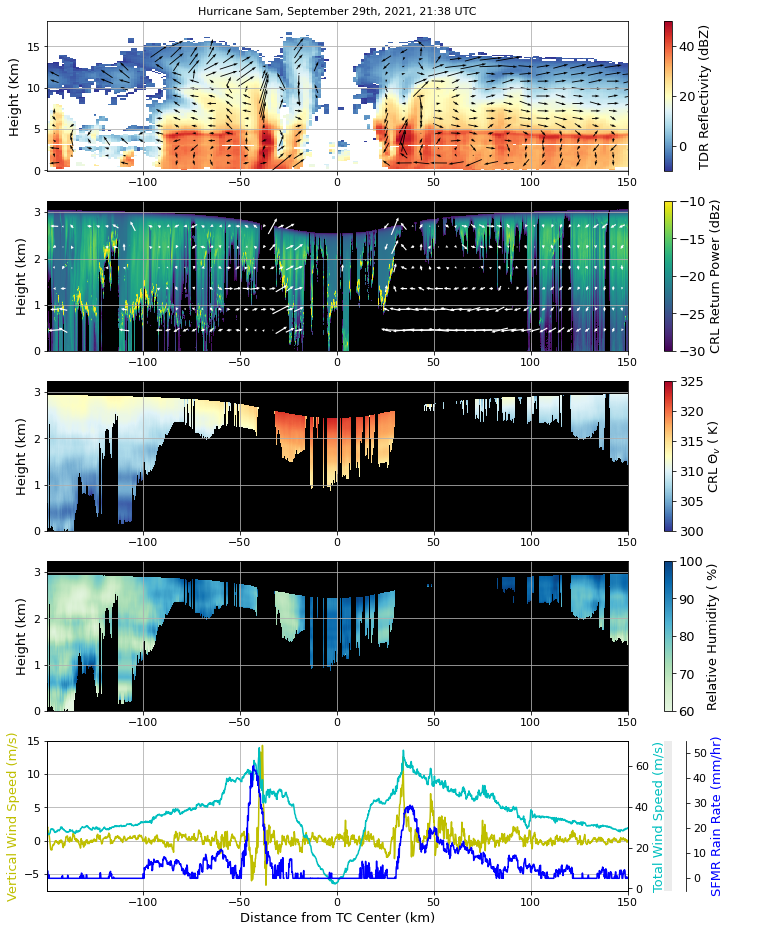

In [140]:
# set up metadata for sam 9/29 pass 1 case

tcname = 'sam'
metadata = tc_metadata.all_data( tcname)
dataset = 5
paddingleft = - 149 # amount of space on each side of tc center
paddingright = 150

# get the correct name of this day's dataset
crl_path = "/Users/etmu9498/research/data/crl-new-matrices"
tdr_path = "/Users/etmu9498/research/data/tdr-new"
tdr_name, crl_name = tc_metadata.choose_new_data( tcname, dataset)

# for plotting theta v- need to manually correct matrices still :(
crl_old_path = "/Users/etmu9498/research/data/CRL_data/2021"
crl_old_name = tc_metadata.choose_crl_date( metadata['dates'][dataset], metadata['crl_list'])

# load data
os.chdir( crl_path)
crl_data = xr.open_dataset( crl_name)

# initialize figure
warnings.filterwarnings("ignore")

fig1 = plt.subplots(5, 1, gridspec_kw={'height_ratios': [ 1, 1, 1, 1, 1]}, figsize=(13, 16)) # (26, 32)) # , facecolor='w')

# fig = plt.figure( figsize=(26, 26)) # , facecolor='w') keep the facecolor blank for a nicer poster background

fsize = 13
helper_fns.change_font_sizes(small=11, medium=fsize)

# create tdr plot
plt.subplot( 511)
plt.title( "Hurricane Sam, September 29th, 2021, 21:38 UTC", loc='center')
# plt.title( "Tail Doppler Radar (TDR) Data", loc='center')
plot_tdr( tdr_path, tdr_name, fsize)
plt.xlim( [ paddingleft, paddingright])

vel_arrows( tdr_path, tdr_name, plot_type='tdr')

print('tdr plot and quiver added')

# plot crl power with in situ distance axis
plt.subplot(512)
plot_power_ch1(crl_path, crl_name, fsize) # use this local function, not the one found in make_plots_new_heights
plt.xlim( [ paddingleft, paddingright])
# plt.title( "Compact Raman Lidar (CRL) Data", loc='center')
plt.ylim( [ 0, crl_data.H_max + .1])

vel_arrows( tdr_path, tdr_name, plot_type='crl')


print( 'crl power plot added')


'''
# plot crl temp with in situ distance axis
plt.subplot(513)

plot_T(crl_path, crl_name) # use this local function, not the one found in make_plots_new_heights
plt.xlim( [ paddingleft, paddingright])
# plt.title( "Compact Raman Lidar (CRL) Data", loc='center')
plt.ylim( [ 0, crl_data.H_max + .1])

print( 'crl temp plot added')
'''

# plot relative humidity
plt.subplot(514)
plot_rh( crl_path, crl_name, fsize)
plt.xlim( [ paddingleft, paddingright])
plt.ylim( [ 0, crl_data.H_max + .1])

print( 'crl rh plot added')


# plot crl wv with in situ distance axis
plt.subplot(513)
plot_thetav( crl_old_path, crl_old_name, metadata, dataset, fsize)

plt.xlim( [ paddingleft, paddingright])
# plt.title( "Compact Raman Lidar (CRL) Data", loc='center')
plt.ylim( [ 0, crl_data.H_max + .1])

print( 'crl theta v plot added')


# remove axes before plotting in situ data? to avoid overlaps
plt.subplot(515)
plt.grid(False)
plt.axis('off')

# plot in situ data
plot_in_situ_stacked( crl_path, crl_name, metadata, dataset, 'dist', plot_number = 515)
plt.xlim( [ paddingleft, paddingright])


print( 'in situ plot added')



os.chdir( "/Users/etmu9498/research/figures/esss-poster")
plt.savefig( "many_subplots.png", dpi=150, bbox_inches='tight')

print( 'figure saved')
